In [152]:
# Import required Libraries & Tools
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
np.random.seed(0)

# Filepaths, numpy, and Tensorflow
import os
import tensorflow as tf

# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

In [153]:
# Read the "category_type.xlxs" file , then store in a Pandas DataFrame
category_type_df = pd.read_excel(
    Path("./category_type.xlsx")
)

# Review the DataFrame
display(category_type_df.head())
display(category_type_df.tail())

,Gender,Subscription_Plan,Age_Group,Renewal_Date_within_Days,Content_Division,Time_Slot,Preferences,Time_Spent_in_Min,Content_Type,Categories
0,Male,Regular,16-20,7,Hollywood,06AM-10AM,Action,1 to 15,Movie,0
1,Female,Silver,20-30,15,Latino,10AM-02PM,Comedy,15 to 30,Web Series,5
2,Male,Gold,30-40,30,Bollywood,02PM-06PM,SciFi,30 to 60,Documentary,2
3,Male,Regular,40-50,45,Mandarin,06PM-10PM,Horror,60 to 120,Movie,0
4,Male,Silver,50-60,60,Arabic,10PM-02AM,Adventure,120-180,Movie,7


,Gender,Subscription_Plan,Age_Group,Renewal_Date_within_Days,Content_Division,Time_Slot,Preferences,Time_Spent_in_Min,Content_Type,Categories
1032,Female,Regular,40-50,45,Hollywood,06AM-10AM,Musical,120-180,Web Series,0
1033,Male,Silver,20-30,7,Mandarin,10PM-02AM,Comedy,60 to 120,Web Series,1
1034,Female,Silver,16-20,7,Latino,10AM-02PM,Thriller,60 to 120,Web Series,2
1035,Female,Silver,30-40,60,Bollywood,02AM-06AM,Action,1 to 15,Documentary,2
1036,Male,Gold,20-30,15,Arabic,10PM-02AM,Adventure,60 to 120,Documentary,0


In [154]:
# Cleanse the data by dropping NaN Values
category_type_df = category_type_df.dropna()

In [155]:
# Review the data types associated with the columns
category_type_df.dtypes

Gender                      object
Subscription_Plan           object
Age_Group                   object
Renewal_Date_within_Days     int64
Content_Division            object
Time_Slot                   object
Preferences                 object
Time_Spent_in_Min           object
Content_Type                object
Categories                   int64
dtype: object

In [156]:
# Create a list of categorical variables 
categorical_variables = list(category_type_df.dtypes[category_type_df.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables

['Gender',
 'Subscription_Plan',
 'Age_Group',
 'Content_Division',
 'Time_Slot',
 'Preferences',
 'Time_Spent_in_Min',
 'Content_Type']

In [157]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [158]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(category_type_df[categorical_variables])

In [159]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables)
)

# Display the DataFrame
display(encoded_df.head())

,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,Age_Group_30-40,...,Preferences_Thriller,Time_Spent_in_Min_1 to 15,Time_Spent_in_Min_120-180,Time_Spent_in_Min_15 to 30,Time_Spent_in_Min_180+,Time_Spent_in_Min_30 to 60,Time_Spent_in_Min_60 to 120,Content_Type_Documentary,Content_Type_Movie,Content_Type_Web Series
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [160]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
encoded_df = pd.concat([
   category_type_df.drop(columns=categorical_variables),
    encoded_df,
], axis=1)

# Review the Dataframe
encoded_df.head()

,Renewal_Date_within_Days,Categories,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,...,Preferences_Thriller,Time_Spent_in_Min_1 to 15,Time_Spent_in_Min_120-180,Time_Spent_in_Min_15 to 30,Time_Spent_in_Min_180+,Time_Spent_in_Min_30 to 60,Time_Spent_in_Min_60 to 120,Content_Type_Documentary,Content_Type_Movie,Content_Type_Web Series
0,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,15,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,45,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [161]:
# Define the target set y using the "Categories" column
y = encoded_df["Categories"]

# Display a sample of y
y[:5]

0    0
1    5
2    2
3    0
4    7
Name: Categories, dtype: int64

In [162]:
# Define features set X by selecting all columns but "Categories"
X = encoded_df.drop(columns=["Categories"])

# Review the features DataFrame
display(X.head())
display(X.tail())

,Renewal_Date_within_Days,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,...,Preferences_Thriller,Time_Spent_in_Min_1 to 15,Time_Spent_in_Min_120-180,Time_Spent_in_Min_15 to 30,Time_Spent_in_Min_180+,Time_Spent_in_Min_30 to 60,Time_Spent_in_Min_60 to 120,Content_Type_Documentary,Content_Type_Movie,Content_Type_Web Series
0,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,15,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,30,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,45,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,Renewal_Date_within_Days,Gender_Female,Gender_Male,Subscription_Plan_Gold,Subscription_Plan_Gole,Subscription_Plan_Regular,Subscription_Plan_Regular,Subscription_Plan_Silver,Age_Group_16-20,Age_Group_20-30,...,Preferences_Thriller,Time_Spent_in_Min_1 to 15,Time_Spent_in_Min_120-180,Time_Spent_in_Min_15 to 30,Time_Spent_in_Min_180+,Time_Spent_in_Min_30 to 60,Time_Spent_in_Min_60 to 120,Content_Type_Documentary,Content_Type_Movie,Content_Type_Web Series
1032,45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1033,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1034,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1035,60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1036,15,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [163]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [165]:
# Next, normalize our training data to be between 0 and 1 by applying MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

# Fit & Transform the scaler to the features training dataset
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
#Review the shape of Training Datasets
X_train.shape, y_train.shape

((777, 45), (777,))

In [167]:
# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

780    2
437    2
233    8
12     2
250    9
636    9
692    3
559    2
530    2
320    8
837    4
422    9
951    1
901    8
937    8
944    8
121    0
764    8
187    6
16     6
Name: Categories, dtype: int64

In [168]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Verify the converted values of y_train
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [169]:
#Review y_train shape
y_train.shape

(777, 10)

In [170]:
# Create an empty sequential model
model = Sequential()

In [171]:
#Review X_train shape1 
X_train.shape[1]

45

In [172]:
# Add the first hidden layer
model.add(Dense(input_dim=X_train.shape[1], units=30, activation='relu'))

In [173]:
# Add the second hidden layer
model.add(Dense(units=20, activation='relu'))

In [174]:
# Add our final output layer where the number of nodes corresponds to the number of y labels i.e. "num_classes"
model.add(Dense(units=num_classes, activation='softmax'))

In [175]:
# We can summarize our model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 30)                1380      
_________________________________________________________________
dense_22 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                210       
Total params: 2,210
Trainable params: 2,210
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your ouel.compile(optimizer='adam', 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [177]:
#Review the shape of X_train & y_train
X_train.shape, y_train.shape

((777, 45), (777, 10))

In [183]:
# Fit (train) the model
fit_model = model.fit(
    X_train,
    y_train,
    epochs=200,
    shuffle=2
)

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0139 - accuracy: 0.6190
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0132 - accuracy: 0.6113
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.6255
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0044 - accuracy: 0.6165
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0019 - accuracy: 0.6062
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9985 - accuracy: 0.6216
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 1.0007 - accuracy: 0.6152
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9989 - accuracy: 0.6229
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9908 - accuracy: 0.6255
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9866 - accuracy: 0.6255
Epoch 11/

25/25 [==============================] - 0s 2ms/step - loss: 0.8294 - accuracy: 0.6525
Epoch 84/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8263 - accuracy: 0.6654
Epoch 85/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8322 - accuracy: 0.6525
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8243 - accuracy: 0.6602
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.6525
Epoch 88/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8258 - accuracy: 0.6564
Epoch 89/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8201 - accuracy: 0.6525
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8185 - accuracy: 0.6577
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.6589
Epoch 92/200
25/25 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.6667
Epoch 93/200


In [184]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 6.3587 - accuracy: 0.1192
Loss: 6.358710765838623, Accuracy: 0.11923076957464218


In [185]:
# Review the shape of y_test
y_test[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [186]:
# Review the shape of y_train
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [187]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"]) + 1))

<AxesSubplot:>

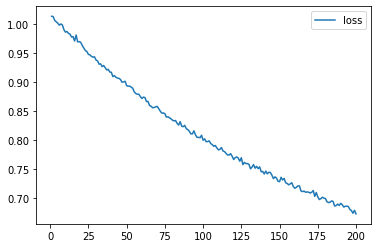

In [188]:
# Vizualize the model plot where the y-axis displays the loss metric
model_plot.plot(y="loss")

<AxesSubplot:>

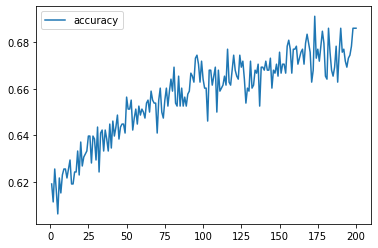

In [189]:
# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")